In [1]:
# import needed packages
%matplotlib inline
import numpy as np, matplotlib.pylab as plt, seaborn as sns, mpmath as mp, scipy.special as ss, sys, datetime
import scipy.stats as stats
sys.path.append('os.getcwd()')
import geopandas as gp, pandas as pd, urllib2
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
from pdf_ccdf import pdf_ccdf
from pdf_functions import pdf_fitter as pdf_fitter
from a_b_functions import kirchner_fitter as kirchner_fitter
from a_b_functions import getFlow as getFlow
from IRA_functions import assess_IRA as assess_IRA
import warnings
warnings.filterwarnings("ignore")

/Users/deale/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Kauai_discharge_txt/USGS16103000_wet.txt
Optimization terminated successfully.
         Current function value: 0.584207
         Iterations: 52
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.710596
         Iterations: 20
         Function evaluations: 40


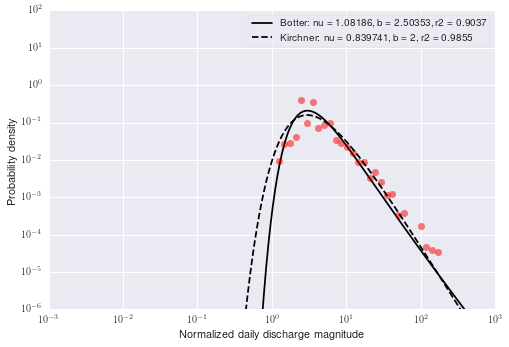

In [2]:
stationIDs = np.array([16103000, 16117000, 16130000, 16010000, 16049000, 16108000, 16116000, 16019000, 16036000, 16101000, 16115000, 16031000, 16047000, 16101003, 16114000, 16016000, 16037100, 16106000, 16013000, 16105000, 16017000, 16028000, 16031001, 16011000, 16012000, 16020000, 16021000, 16015000])

B_pdf_hat_t = {}
nu_hat_t = {}
nu_2_t = {}
fig, ax = plt.subplots(1)
for stationID in [16103000]:#stationIDs:
    for season in ['wet']:#, 'dry', 'yr']:
        fname = 'Kauai_discharge_txt/USGS%i_%s.txt' % (stationID, season)
        fname2 = 'USGS%i_%s' % (stationID, season)
        print(fname)
        df = pd.read_csv(fname, header=None)
        
        sample = df.values[:,0]
        sample = sample[:1000]
        sample = sample[sample>=0.1*sample.mean()]

        B_pdf_hat_t[fname2], nu_hat_t[fname2], B_pdf_bse, nu_bse, mu_t, b_r2 = pdf_fitter(sample, ax=ax)
        B, nu_2_t[fname2], B_pdf_bse, nu_bse, mu_t, b_r2 = pdf_fitter(sample, b=2., ax=ax)